# Seasonality of the Mixed Layer Depth (MLD) Group 
OOI Data Labs Workshop - August 2019

Revised Oct 13, 2020

**Working Title**: Seasonal Variability In The Mixed Layer 

**Short Description**: How and why does the mixed layer depth in the ocean vary

In [ ]:
# Notebook Setup
import xarray as xr
!pip install netcdf4
import matplotlib.pyplot as plt

# Setup default plot styles
import seaborn as sns
sns.set()

# Supress open_mfdataset warnings
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 4.3MB 2.7MB/s 
     |████████████████████████████████| 296kB 19.7MB/s 


This notebook will utilize the new `ooilab` library I have developed to limit the coded needed.

In [ ]:
!pip install git+https://github.com/seagrinch/ooilab.git
import ooilab

  Cloning https://github.com/seagrinch/ooilab.git to /tmp/pip-req-build-4b7zdixe
  Running command git clone -q https://github.com/seagrinch/ooilab.git /tmp/pip-req-build-4b7zdixe
  Created wheel for ooilab: filename=ooilab-0.2-cp36-none-any.whl size=2506 sha256=6904283443b47c4ef85a3e82931398b4c3802b434090fdd27067c5754d74ccc0
  Stored in directory: /tmp/pip-ephem-wheel-cache-h8thxhzi/wheels/7f/c9/1d/60f91d31a29c5e03e8bc9dd7a58918a976a3f2ffe1ffcb3ea1
Successfully built ooilab


In [ ]:
ooilab.API_USERNAME = ''
ooilab.API_TOKEN = ''

This activity was initially inspired by the Thermohaline activity developed at the June 2019 workshop.  However, this version will focus on the Mixed-Layer Depth dynamics at both [Irminger Sea Flanking Mooring B](https://datareview.marine.rutgers.edu/sites/view/GI03FLMB) (used for all 3 widgets) and [Station Papa Flanking Mooring B](https://datareview.marine.rutgers.edu/sites/view/GP03FLMB) (added in for the CI widget only).

The Flanking Moorings at both locations provide CTD data from 30m to 1500m (though we will only use up to 1000m).  Becuase the surface mooring datasets are so gappy, we will obtain SST, Solar Irradiance and Wind Speed data from the ECMWF reanalysis from a co-located gridpoint.  

In addition, Application widget also calls for Chlorophyll data for Irgminger.  We will use the data from the 30m Flanking mooring.  The surface buoy has 1m and 12m FLORTs available, but again it has large gaps.

## Request Data from OOINet (run only once)


In [ ]:
# CTD Data Requests
ctds_GI = ['GI03FLMB-RIM01-02-CTDMOG060',
 'GI03FLMB-RIM01-02-CTDMOG061',
 'GI03FLMB-RIM01-02-CTDMOG062',
 'GI03FLMB-RIM01-02-CTDMOG063',
 'GI03FLMB-RIM01-02-CTDMOG064',
 'GI03FLMB-RIM01-02-CTDMOG065',
 'GI03FLMB-RIM01-02-CTDMOG066',
 'GI03FLMB-RIM01-02-CTDMOG067',
 'GI03FLMB-RIM01-02-CTDMOG068',
 'GI03FLMB-RIM01-02-CTDMOH069',
 'GI03FLMB-RIM01-02-CTDMOH070']

ctds_GP = ['GP03FLMB-RIM01-02-CTDMOG060',
 'GP03FLMB-RIM01-02-CTDMOG061',
 'GP03FLMB-RIM01-02-CTDMOG062',
 'GP03FLMB-RIM01-02-CTDMOG063',
 'GP03FLMB-RIM01-02-CTDMOG064',
 'GP03FLMB-RIM01-02-CTDMOG065',
 'GP03FLMB-RIM01-02-CTDMOG066',
 'GP03FLMB-RIM01-02-CTDMOG067',
 'GP03FLMB-RIM01-02-CTDMOG068',
 'GP03FLMB-RIM01-02-CTDMOH069',
 'GP03FLMB-RIM01-02-CTDMOH070']

# for ctd in ctds_GI:
#   print(ctd)
#   response = ooilab.request_data(ctd,'recovered_inst','ctdmo_ghqr_instrument_recovered')
#   print(response)

In [ ]:
# Chlorophyll Requests
# ooilab.request_data('GI03FLMA-RIS01-05-FLORTD000','recovered_host','flort_sample')
# ooilab.request_data('GI03FLMB-RIS01-05-FLORTD000','recovered_host','flort_sample')

## Load Data Files

In [ ]:
url_ctd_GI={}
url_ctd_GI['30m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143448626Z-GI03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GI['40m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143451980Z-GI03FLMB-RIM01-02-CTDMOG061-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GI['60m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143454726Z-GI03FLMB-RIM01-02-CTDMOG062-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GI['90m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143501299Z-GI03FLMB-RIM01-02-CTDMOG063-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GI['130m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143502477Z-GI03FLMB-RIM01-02-CTDMOG064-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GI['180m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143503570Z-GI03FLMB-RIM01-02-CTDMOG065-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GI['250m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143504983Z-GI03FLMB-RIM01-02-CTDMOG066-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GI['350m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143507003Z-GI03FLMB-RIM01-02-CTDMOG067-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GI['500m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143511186Z-GI03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GI['750m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143513701Z-GI03FLMB-RIM01-02-CTDMOH069-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GI['1000m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143514413Z-GI03FLMB-RIM01-02-CTDMOH070-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'


In [ ]:
url_ctd_GP={}
url_ctd_GP['30m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143402765Z-GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GP['40m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143404695Z-GP03FLMB-RIM01-02-CTDMOG061-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GP['60m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143407009Z-GP03FLMB-RIM01-02-CTDMOG062-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GP['90m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143408422Z-GP03FLMB-RIM01-02-CTDMOG063-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GP['130m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143409546Z-GP03FLMB-RIM01-02-CTDMOG064-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GP['180m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143410801Z-GP03FLMB-RIM01-02-CTDMOG065-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GP['250m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143412320Z-GP03FLMB-RIM01-02-CTDMOG066-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GP['350m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143414409Z-GP03FLMB-RIM01-02-CTDMOG067-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GP['500m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143415714Z-GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GP['750m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143416880Z-GP03FLMB-RIM01-02-CTDMOH069-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'
url_ctd_GP['1000m'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143420061Z-GP03FLMB-RIM01-02-CTDMOH070-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'


In [ ]:
# Load all Irminger (GI) Temperature datasets - Daily averaged
ctd_temp_GI = xr.Dataset()
for ctd in url_ctd_GI.keys():
  print('Loading: %s' % ctd)
  flist = ooilab.get_filelist(url_ctd_GI[ctd])
  data = xr.open_mfdataset(flist).swap_dims({'obs': 'time'}).sortby('time')
  d = ooilab.clean_data(data['ctdmo_seawater_temperature'].load())
  d = d.resample(time='1D').mean()
  d = d.to_dataset().rename({'ctdmo_seawater_temperature': 'GI '+ctd})
  ctd_temp_GI = xr.merge([ctd_temp_GI, d])

Loading: 30m
Loading: 40m
Loading: 60m
Loading: 90m
Loading: 130m
Loading: 180m
Loading: 250m
Loading: 350m
Loading: 500m
Loading: 750m
Loading: 1000m


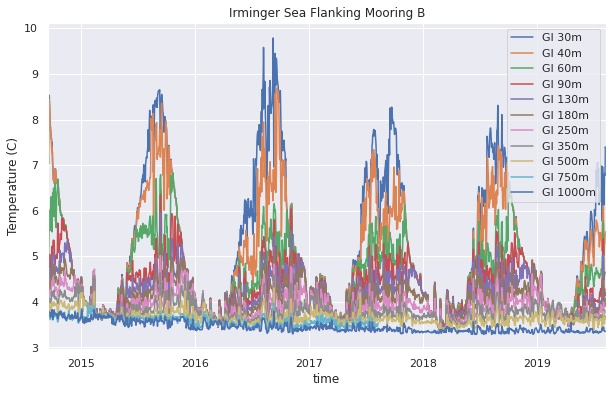

In [ ]:
# Plot of daily average
fig,ax = plt.subplots(1,1,figsize=(10,6))
ctd_temp_GI.to_dataframe().plot(ax=ax);
ax.set_ylabel('Temperature (C)')
plt.legend(loc=1)
plt.title('Irminger Sea Flanking Mooring B')
plt.savefig('GI_temperatures.png');

In [ ]:
# Load all Papa (GP) Temperature datasets - Daily averaged
ctd_temp_GP = xr.Dataset()
for ctd in url_ctd_GP.keys():
  print('Loading: %s' % ctd)
  flist = ooilab.get_filelist(url_ctd_GP[ctd])
  data = xr.open_mfdataset(flist).swap_dims({'obs': 'time'}).sortby('time')
  d = ooilab.clean_data(data['ctdmo_seawater_temperature'].load())
  d = d.resample(time='1D').mean()
  d = d.to_dataset().rename({'ctdmo_seawater_temperature': 'GP '+ctd})
  ctd_temp_GP = xr.merge([ctd_temp_GP, d])


Loading: 30m
Loading: 40m
Loading: 60m
Loading: 90m
Loading: 130m
Loading: 180m
Loading: 250m
Loading: 350m
Loading: 500m
Loading: 750m
Loading: 1000m


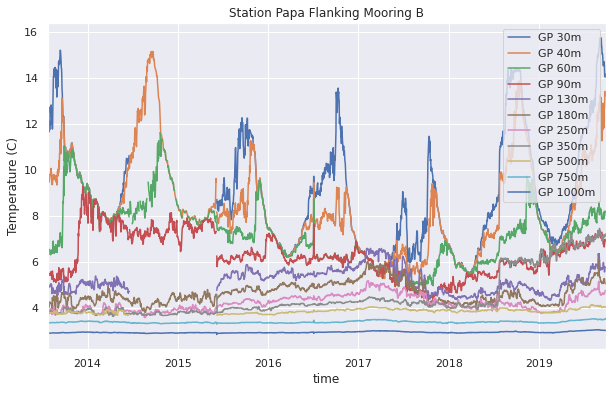

In [ ]:
# Plot of daily average
fig,ax = plt.subplots(1,1,figsize=(10,6))
ctd_temp_GP.to_dataframe().plot(ax=ax);
ax.set_ylabel('Temperature (C)')
plt.legend(loc=1)
plt.title('Station Papa Flanking Mooring B')
plt.savefig('GP_temperatures.png');

### Chlorophyll Data

In [ ]:
url_flort_GIA = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143212222Z-GI03FLMA-RIS01-05-FLORTD000-recovered_host-flort_sample/catalog.html'
url_flort_GIB = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20201013T143218101Z-GI03FLMB-RIS01-05-FLORTD000-recovered_host-flort_sample/catalog.html'

In [ ]:
# Load data
flist = ooilab.get_filelist(url_flort_GIA)
chl1 = xr.open_mfdataset(flist).swap_dims({'obs': 'time'}).sortby('time')
chl1 = ooilab.clean_data(chl1['fluorometric_chlorophyll_a'].load())
chl1 = chl1.resample(time='1D').mean()
chl1 = chl1.to_dataset().rename({'fluorometric_chlorophyll_a': 'GIA chl'})

flist = ooilab.get_filelist(url_flort_GIB)
chl2 = xr.open_mfdataset(flist).swap_dims({'obs': 'time'}).sortby('time')
chl2 = ooilab.clean_data(chl2['fluorometric_chlorophyll_a'].load())
chl2 = chl2.resample(time='1D').mean()
chl2 = chl2.to_dataset().rename({'fluorometric_chlorophyll_a': 'GIB chl'})

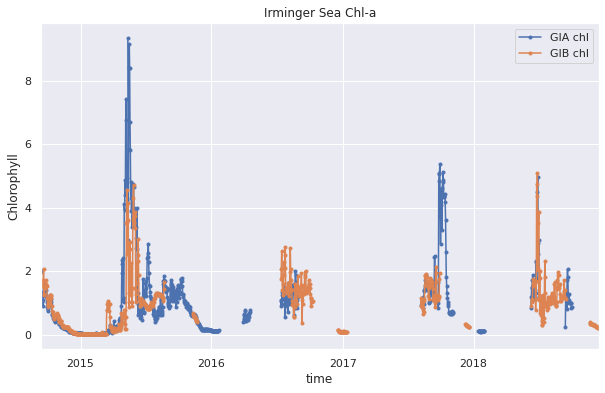

In [ ]:
# Plot data
fig,ax = plt.subplots(1,1,figsize=(10,6))
chl1.to_dataframe().plot(ax=ax,marker='.');
chl2.to_dataframe().plot(ax=ax,marker='.');
ax.set_ylabel('Chlorophyll')
plt.legend(loc=1)
plt.title('Irminger Sea Chl-a')
plt.savefig('GI_chl.png');


## Load Model Data for the Surface
Because the surface mooring is so gappy, we will grab wind and irradiance data from ERA5.  See appendix for information on how to download a netcdf file containing the model data we want.

In [ ]:
# Open dataset
era5_GI = xr.open_dataset('era5data_GI.nc')

# Combine historical and recent variables
era5_GI['u10'] = era5_GI.u10_0001.combine_first(era5_GI.u10_0005)
era5_GI['v10'] = era5_GI.v10_0001.combine_first(era5_GI.v10_0005)
era5_GI['sst'] = era5_GI.sst_0001.combine_first(era5_GI.sst_0005)
era5_GI['ssrd'] = era5_GI.ssrd_0001.combine_first(era5_GI.ssrd_0005)

# Calculate Wind Speed
era5_GI['ws'] = (era5_GI.u10**2 + era5_GI.v10**2)**.5

# Convert from K to C
era5_GI['sst2'] = era5_GI['sst'] - 273.15 

# Convert J/m^2 to W/m^2 for Irradiance
era5_GI['irr'] = era5_GI['ssrd']/3600

# Average grid points
era5_GI['ws_avg'] = era5_GI['ws'].mean(dim=['longitude','latitude'])
era5_GI['sst_avg'] = era5_GI['sst2'].mean(dim=['longitude','latitude'])
era5_GI['irr_avg'] = era5_GI['irr'].mean(dim=['longitude','latitude'])

# Daily Means
era5b_GI = era5_GI[['ws_avg','sst_avg','irr_avg']].resample(time='1D').mean()
era5b_GI = era5b_GI.rename({'ws_avg':'GI_ws_avg','sst_avg':'GI_sst_avg','irr_avg':'GI_irr_avg'})

In [ ]:
era5_GP = xr.open_dataset('era5data_GP.nc')

# Combine historical and recent variables
era5_GP['u10'] = era5_GP.u10_0001.combine_first(era5_GP.u10_0005)
era5_GP['v10'] = era5_GP.v10_0001.combine_first(era5_GP.v10_0005)
era5_GP['sst'] = era5_GP.sst_0001.combine_first(era5_GP.sst_0005)
era5_GP['ssrd'] = era5_GP.ssrd_0001.combine_first(era5_GP.ssrd_0005)

# Calculate Wind Speed
era5_GP['ws'] = (era5_GP.u10**2 + era5_GP.v10**2)**.5

# Convert from K to C
era5_GP['sst2'] = era5_GP['sst'] - 273.15 

# Convert J/m^2 to W/m^2 for Irradiance
era5_GP['irr'] = era5_GP['ssrd']/3600

# Average grid points
era5_GP['ws_avg'] = era5_GP['ws'].mean(dim=['longitude','latitude'])
era5_GP['sst_avg'] = era5_GP['sst2'].mean(dim=['longitude','latitude'])
era5_GP['irr_avg'] = era5_GP['irr'].mean(dim=['longitude','latitude'])

# Daily Means
era5b_GP = era5_GP[['ws_avg','sst_avg','irr_avg']].resample(time='1D').mean()
era5b_GP = era5b_GP.rename({'ws_avg':'GP_ws_avg','sst_avg':'GP_sst_avg','irr_avg':'GP_irr_avg'})

## Merge & Average Datasets

In [ ]:
# Merge all datasets
alldata = xr.merge([ctd_temp_GI,ctd_temp_GP,era5b_GI,era5b_GP,chl1,chl2])

In [ ]:
# Remove errant CTD data for GP 350m Deployment 6
# As of right now, it looks like the wrong dataset was processed
alldata['GP 350m'] = ooilab.clean_data(alldata['GP 350m'],0,5)

In [ ]:
# Calculate 1-Week Average
alldata_1w = alldata.resample(time='1W').mean().to_dataframe()

## MLD Calculation
We will calculate a crude Mixed-Layer Depth by interpolating the depth that is 0.5 C less than the surface temperature.  

Note, this is a crude calculation, since we will assume the CTDs are deployed at their "design" depths.  A more correct interpolation would take into account their actual pressure depths.

For GI, the model SST is often below the CTD temperatures (let along 0.5C less than that), but this is ok because in the winter the entire column appears to be well mixed, so we will default the MLD to 1000m.


In [ ]:
import numpy as np
from scipy import interpolate
import pandas as pd

In [ ]:
# Setup output columns 
alldata_1w['GP MLD'] = np.nan
alldata_1w['GI MLD'] = np.nan

# Iterate over each row and calculate MLD
for index, row in alldata_1w.iterrows():
  # Station Papa
  d = pd.DataFrame()
  d['temps'] = [row['GP_sst_avg'],row['GP 30m'],row['GP 40m'],row['GP 60m'],row['GP 90m'],row['GP 130m'],row['GP 180m'],row['GP 250m'],row['GP 350m'],row['GP 500m'],row['GP 750m'],row['GP 1000m']]
  d['depths'] = [0,30,40,60,90,130,180,250,350,500,750,1000]
  d = d.dropna()
  if d.shape[0]>3:
    f = interpolate.interp1d(d['temps'],d['depths'])
    alldata_1w['GP MLD'][index] = f(row['GP_sst_avg']-0.5)
  # Irminger
  d = pd.DataFrame()
  d['temps'] = [row['GI_sst_avg'],row['GI 30m'],row['GI 40m'],row['GI 60m'],row['GI 90m'],row['GI 130m'],row['GI 180m'],row['GI 250m'],row['GI 350m'],row['GI 500m'],row['GI 750m'],row['GI 1000m']]
  d['depths'] = [0,30,40,60,90,130,180,250,350,500,750,1000]
  d = d.dropna()
  if d.shape[0]>3:
    f = interpolate.interp1d(d['temps'],d['depths'],bounds_error=False, fill_value=1000)
    alldata_1w['GI MLD'][index] = f(row['GI_sst_avg']-0.5)


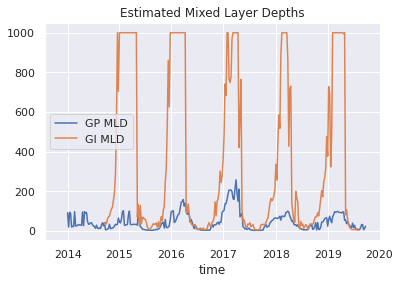

In [ ]:
alldata_1w['GP MLD'].plot()
alldata_1w['GI MLD'].plot()
plt.title('Estimated Mixed Layer Depths')
plt.legend();

## Plot the Data

In [ ]:
# Export to CSV
alldata_1w.to_csv('mld_application.csv')

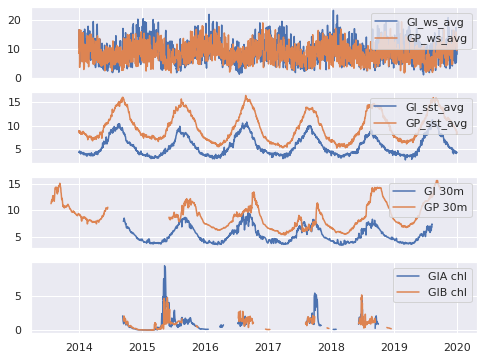

In [ ]:
# Quick plot
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1, sharex=True, figsize=(8,6))
ax1.plot(alldata.time, alldata['GI_ws_avg'],label='GI_ws_avg')
ax1.plot(alldata.time, alldata['GP_ws_avg'],label='GP_ws_avg')
ax2.plot(alldata.time, alldata['GI_sst_avg'],label='GI_sst_avg')
ax2.plot(alldata.time, alldata['GP_sst_avg'],label='GP_sst_avg')
ax3.plot(alldata.time, alldata['GI 30m'],label='GI 30m')
ax3.plot(alldata.time, alldata['GP 30m'],label='GP 30m')
ax4.plot(alldata.time, alldata['GIA chl'],label='GIA chl')
ax4.plot(alldata.time, alldata['GIB chl'],label='GIB chl')
ax1.legend(loc=1); ax2.legend(loc=1); ax3.legend(); ax4.legend();

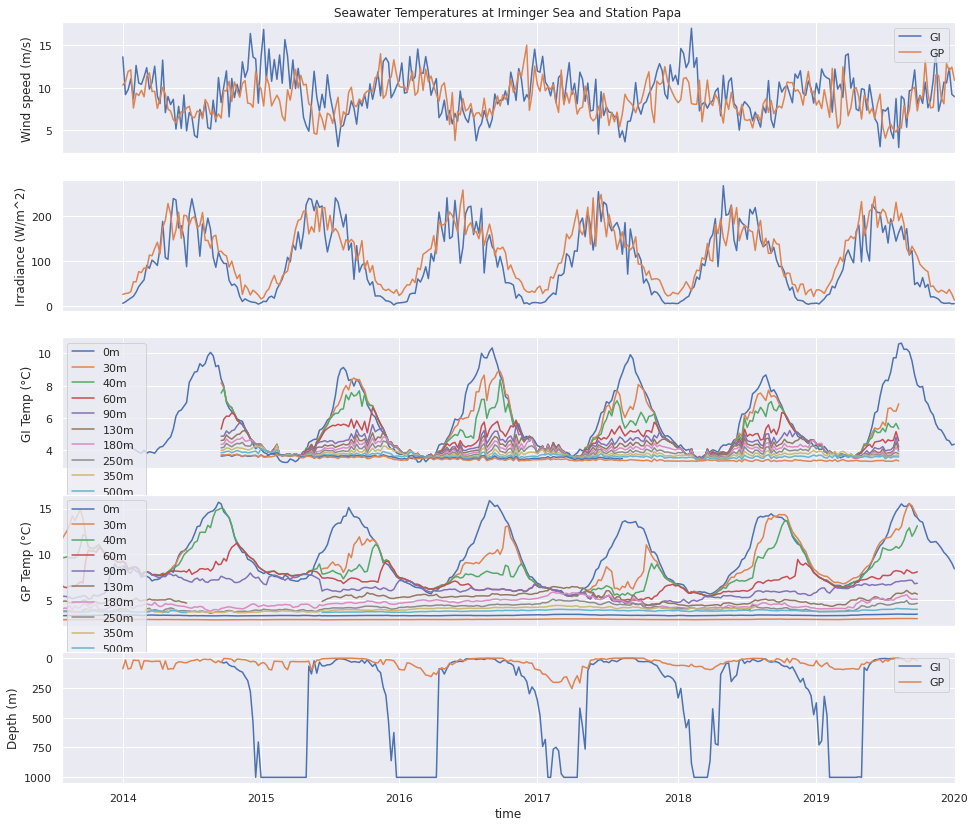

In [ ]:
# Complete Plot of all data
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, sharex=True, figsize=(16,14))

# Winds
alldata_1w.GI_ws_avg.plot(ax=ax1,label='GI')
alldata_1w.GP_ws_avg.plot(ax=ax1,label='GP')
ax1.legend(loc=1)
ax1.set_ylabel('Wind speed (m/s)')

# Irradiance
alldata_1w.GI_irr_avg.plot(ax=ax2,label='GI')
alldata_1w.GP_irr_avg.plot(ax=ax2,label='GP')
ax1.legend(loc=1)
ax2.set_ylabel('Irradiance (W/m^2)')

# Temperature
alldata_1w['GI_sst_avg'].plot(ax=ax3,label='0m')
alldata_1w['GI 30m'].plot(ax=ax3,label='30m')
alldata_1w['GI 40m'].plot(ax=ax3,label='40m')
alldata_1w['GI 60m'].plot(ax=ax3,label='60m')
alldata_1w['GI 90m'].plot(ax=ax3,label='90m')
alldata_1w['GI 130m'].plot(ax=ax3,label='130m')
alldata_1w['GI 180m'].plot(ax=ax3,label='180m')
alldata_1w['GI 250m'].plot(ax=ax3,label='250m')
alldata_1w['GI 350m'].plot(ax=ax3,label='350m')
alldata_1w['GI 500m'].plot(ax=ax3,label='500m')
alldata_1w['GI 750m'].plot(ax=ax3,label='750m')
alldata_1w['GI 1000m'].plot(ax=ax3,label='1000m')
ax3.legend(loc=2)
ax3.set_ylabel('GI Temp (°C)')

alldata_1w['GP_sst_avg'].plot(ax=ax4,label='0m')
alldata_1w['GP 30m'].plot(ax=ax4,label='30m')
alldata_1w['GP 40m'].plot(ax=ax4,label='40m')
alldata_1w['GP 60m'].plot(ax=ax4,label='60m')
alldata_1w['GP 90m'].plot(ax=ax4,label='90m')
alldata_1w['GP 130m'].plot(ax=ax4,label='130m')
alldata_1w['GP 180m'].plot(ax=ax4,label='180m')
alldata_1w['GP 250m'].plot(ax=ax4,label='250m')
alldata_1w['GP 350m'].plot(ax=ax4,label='350m')
alldata_1w['GP 500m'].plot(ax=ax4,label='500m')
alldata_1w['GP 750m'].plot(ax=ax4,label='750m')
alldata_1w['GP 1000m'].plot(ax=ax4,label='1000m')
ax4.legend(loc=2)
ax4.set_ylabel('GP Temp (°C)')

# Mixed Layer Depth
alldata_1w['GI MLD'].plot(ax=ax5,label='GI')
alldata_1w['GP MLD'].plot(ax=ax5,label='GP')
ax5.invert_yaxis()
ax5.legend(loc=1)
ax5.set_ylabel('Depth (m)')

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')

ax1.set_title('Seawater Temperatures at Irminger Sea and Station Papa');

plt.savefig('GIGP_MLD.png');

## Appendix - Requesting Model Data
Data from ECMWF can be obtained using the following script.  Previoulsy we used ERA-Interium, but that was discontinued in Aug 2019, so now we need to use ERA5.  For more, see the [ERA5 CDS API Doc](https://confluence.ecmwf.int/display/CKB/How+to+download+ERA5)

Note, in order for this to run on Colab, you will need to create a file at /root/.cdsapirc with your [api key](https://cds.climate.copernicus.eu/api-how-to).

In [ ]:
# # First upload the file to your Colab workspace, then move it with this command
# ! mv /content/cdsapirc /root/.cdsapirc

In [ ]:
# pip install cdsapi

In [ ]:
# # Request ERA5 data for Irminger Sea area
# import cdsapi
# c = cdsapi.Client()
# c.retrieve(
#     'reanalysis-era5-single-levels',
#     {
#         'product_type': 'reanalysis',
#         'variable': [
#             '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature',
#             'sea_surface_temperature', 'surface_solar_radiation_downwards',
#         ],
#         'year': [
#             '2014','2015', '2016', 
#             '2017','2018', '2019',
#         ],
#         'month': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#         ],
#         'day': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#             '13', '14', '15',
#             '16', '17', '18',
#             '19', '20', '21',
#             '22', '23', '24',
#             '25', '26', '27',
#             '28', '29', '30',
#             '31',
#         ],
#         'time': [
#             '00:00', '03:00', '06:00',
#             '09:00', '12:00', '15:00',
#             '18:00', '21:00',
#         ],
#         # 'area' : [61, -40, 59, -38], # North, West, South, East. Irminger
#         'area' : [51, -145, 49, -143], # North, West, South, East. Station Papa
#         'format': 'netcdf',
#     },
#     'era5data.nc')

In [ ]:
# # Download datafile
# url_ecm = 'http://136.156.133.32/cache-compute-0009/cache/data7/adaptor.mars.internal-1579212914.3257482-24922-17-626b9dcc-598c-4be3-a5d0-0330354461ae.nc'
# from urllib.request import urlretrieve
# urlretrieve(url_ecm,'ecmdata.nc')